<a href="https://colab.research.google.com/github/Dhananjay-97/Chatbot/blob/main/invoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Text Extraction from PDF with Bounding Boxes

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (30.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.5 MB/s eta 0:00:00


In [4]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.1 MB/s eta 0:00:00


In [5]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

import os
import pandas as pd
import numpy as np

import pytesseract
from PIL import ImageEnhance, ImageFilter, Image, ImageDraw, ImageFont

In [6]:
image = Image.open("/content/drive/MyDrive/LayoutLMCLF/docs_data/flipkart_invoice/OD110310456349613000_0.png")
image = image.convert("RGB")

ocr_df = pytesseract.image_to_data(image, output_type='data.frame',)
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])

In [7]:
words

'Tax Invoice | Order Id: 0D110310456349613000 Invoice No: FAA2LS1800115824 —_GSTIN: O7AKYPG9978R1Z1 Order Date: 24-09-2017, 04:04 PM Invoice Date: 2017-09-27, 01:31 PM PAN: AKYPG9S7BR Sold By Shipping ADDRESS Billing Address APEKSHA INTERNATIONAL, Ganesh Lokhande, Goresh LokFarse, Coley2,, Lawrerce Roas iru strial Area,Nce Doli, NEW 529, 520, DELH.- 110035 Ambewadi, Roha, Ambowasi, Roba GST: O7AKYPG9978R1Z1 Hanuman temple, Harmar temple, Raigarh District - 402304, IN-MH Raigart District 402304, n-H, Gross ; Taxable Product Description Qty amount Discount TYAN IGsT Total Oricum COMBO(O}-383+ 349 Loaters Blue & Black 7 | COMBO(O}-383-349-7 | 30 day HSN: 640daaaa | IGST: 5% 1 459 “0 437.14 21.86 459 Exchange Guarantee Shipping and Handling 1 40.0 0 38.1 18 40.0 Charges TOTAL PRICE: 499 TOTAL QTY: 1 All values are in INR Seller Registered Address: APEKSHA INTERNATIONAL, Cau, Laeterce Ras Ireustrial Arca.New, Delhi, NEW DELHI - 130035 Declaration ‘The ga0es solb arcirterece for ero user cor

## Visualize the bounding boxes for recognized words

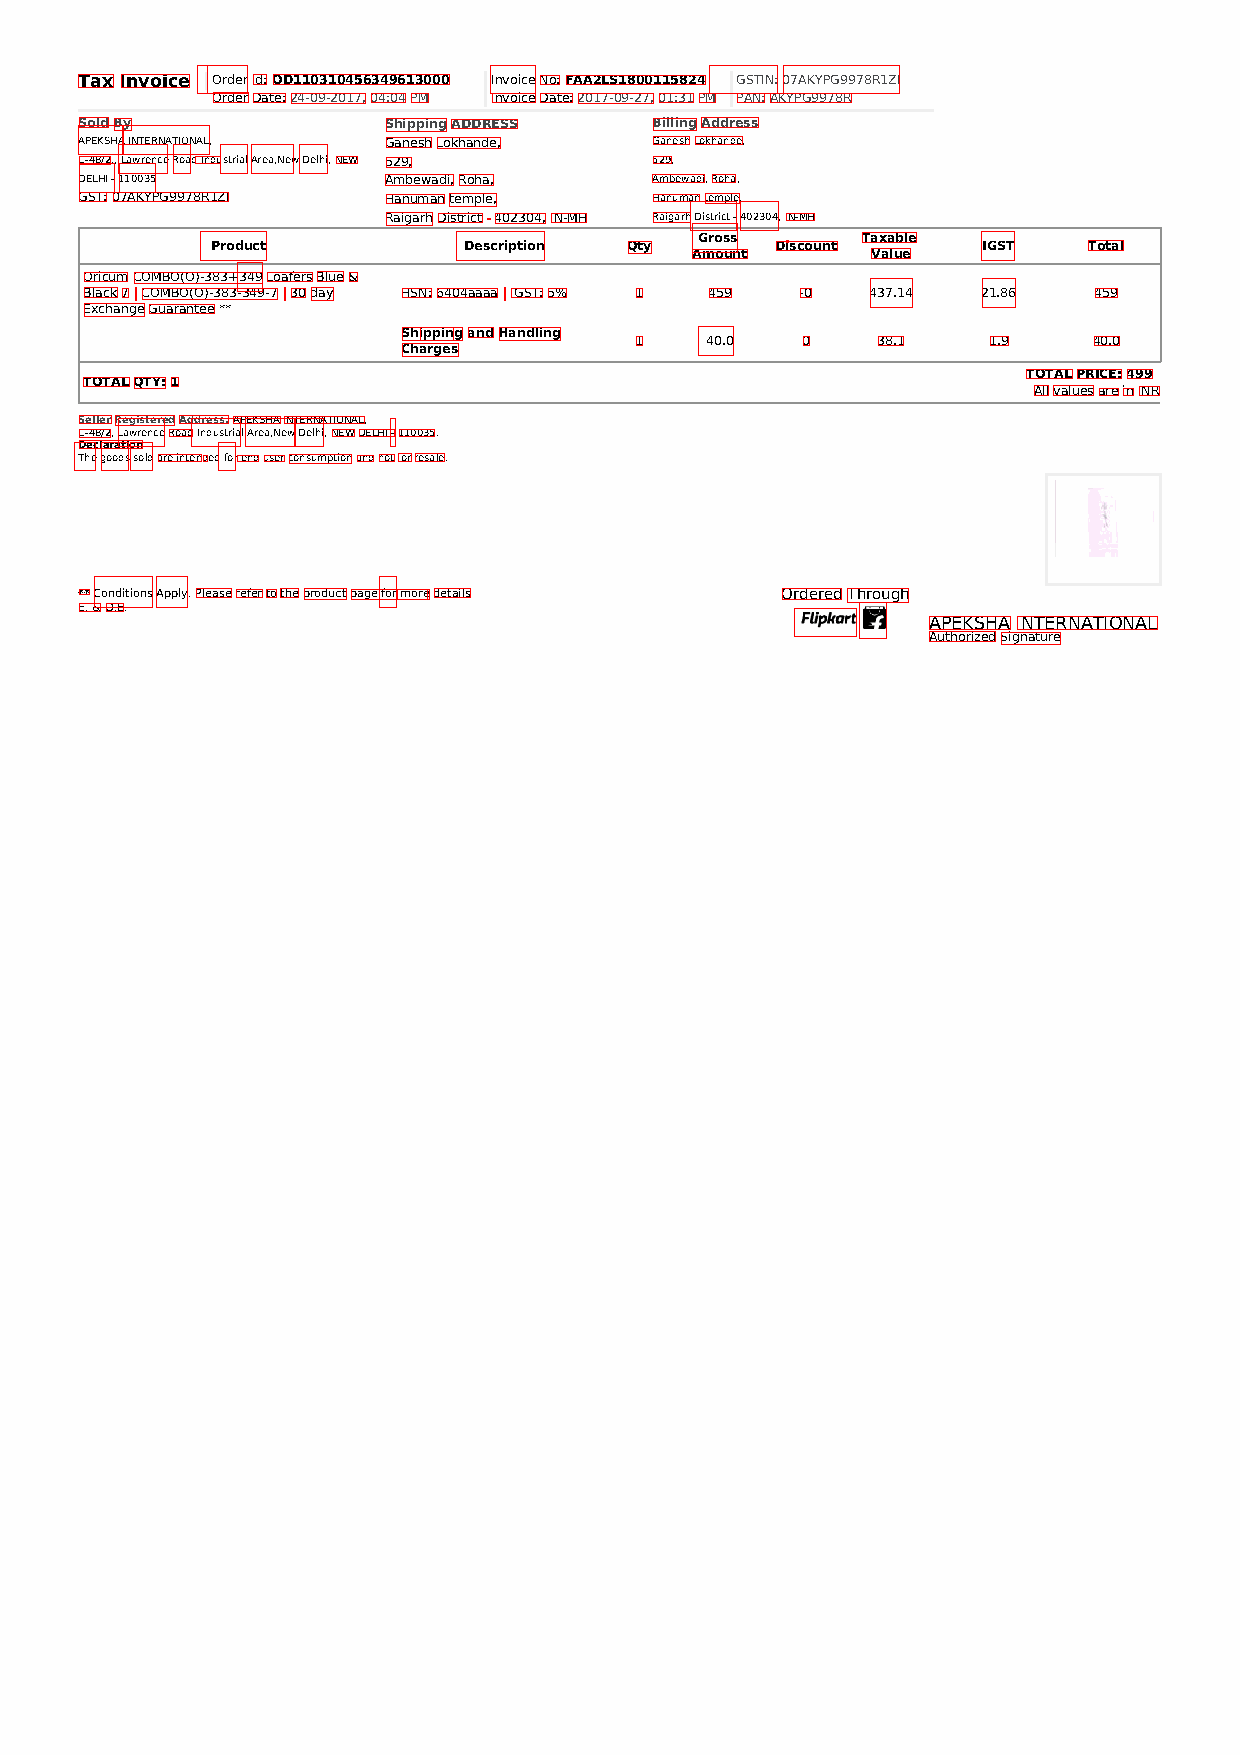

In [8]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

## Preprocess the data using dataframe

convert the dataset into a Pandas dataframe, having 2 columns: image_path and label.

In [9]:
dataset_path = "/content/drive/MyDrive/Invoice_Extraction/docs_data"

In [12]:
image_path = []

for filename in os.listdir(dataset_path):
  # print(filename)
  image_path.append(dataset_path + '/' + filename)

data = pd.DataFrame({'image':image_path})
data.head()

,image
0,/content/drive/MyDrive/Invoice_Extraction/docs...
1,/content/drive/MyDrive/Invoice_Extraction/docs...
2,/content/drive/MyDrive/Invoice_Extraction/docs...
3,/content/drive/MyDrive/Invoice_Extraction/docs...
4,/content/drive/MyDrive/Invoice_Extraction/docs...


### get words and bounding boxes for every image file. for this we use Huggingface dataset and .map function and also normalized the bounding boxes of every image (Tesseract)

In [13]:
from datasets import Dataset

def normalize_box(box, width, height):
     return [
         int(1000 * (box[0] / width)),
         int(1000 * (box[1] / height)),
         int(1000 * (box[2] / width)),
         int(1000 * (box[3] / height)),
     ]

def apply_ocr(example):
        # get the image
        image = Image.open(example['image'])
        fname = example['image'].split('/')[-1]
        width, height = image.size

        # apply ocr to the image
        ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
        float_cols = ocr_df.select_dtypes('float').columns
        ocr_df = ocr_df.dropna().reset_index(drop=True)
        ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
        ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
        ocr_df = ocr_df.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_df.text if str(word) != 'nan'])
        words = list(ocr_df.text)
        words = [str(w) for w in words]
        coordinates = ocr_df[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
            actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
            actual_boxes.append(actual_box)

        # image = Image.open(dataset_path)
        # # normalize the bounding boxes
        # boxes = []
        # for box in actual_boxes:
        #     boxes.append(normalize_box(box, width, height))

        # image = image.convert("RGB")
        # draw = ImageDraw.Draw(image, "RGB")
        # for box in actual_boxes:
        #   draw.rectangle(box, outline='red')

        # new_path = os.path.join('/content/drive/MyDrive/Invoice_Extraction/ann_data',fname)
        # image.save(new_path)

        # add as extra columns
        assert len(words) == len(actual_boxes)
        example['words'] = words
        example['bbox'] = actual_boxes
        # example['image'] = new_path
        return example

dataset = Dataset.from_pandas(data)
updated_dataset = dataset.map(apply_ocr,)

Map:   0%|          | 0/95 [00:00<?, ? examples/s]

In [15]:
updated_dataset

Dataset({
    features: ['image', 'words', 'bbox'],
    num_rows: 95
})

## observe the data

In [16]:
df = pd.DataFrame.from_dict(updated_dataset)
print(len(df["words"][0]))
print(df["words"][0])

317
['Tax', 'Invoice', 'Sold', 'By:', 'Tech-Connect', 'Retail', 'Private', 'Limited', ',', 'i', 'Invoice', 'Number', '#', 'FAA9Q31900421758', 'i', 'Ship-from', 'Address:', 'Avaashya', 'CCI', 'Logistics', 'Lid', 'Renaissance', 'Industrial', 'Park', 'Building', 'no.', 'B', '2,Kalyan-', 'Padgha', 'road,', 'Kalyan-', 'Padgha', ':', 'road,', 'Village-Vashere,', 'Bhiwandi.,', 'Thane,', 'Maharashtra,', 'India', '-', '421302,', 'IN-MH', 'GSTIN', '-', '27AAICA4872D1Z0', 'Order', 'ID:', 'OD112860337304468000', 'pi', 'To', 'Ship', 'To', 'Order', 'Date:', '16-07-2018', 'Dhananjay', 'Devidas', 'Lokhande', 'Dhananjay', 'Devidas', 'Lokhande', 'Boys', 'hostel,', 'Vishwaniketan', 'imeet', 'Boys', 'hostel,', 'Vishwaniketan', 'imeet', '*Keep', 'this', 'invoice', 'and', 'Invoice', 'Date:', '17-07-2018', 'college', ',', 'dhamani,kumbhivali,', 'college', ',', 'dhamani,kumbhivali,', 'manufacturer', 'box', 'for', 'PAN:', 'AAICA4872D', 'Khalapur,kumbhivali.', 'Khalapur,kumbhivali.', 'warranty', 'purposes.', 'K

In [17]:
print(len(df["bbox"][0]))
print(df["bbox"][0])

317
[[538, 26, 580, 44], [588, 25, 667, 44], [25, 55, 60, 69], [67, 56, 91, 73], [97, 55, 216, 69], [222, 55, 268, 69], [275, 55, 334, 69], [340, 55, 410, 72], [402, 51, 411, 77], [860, 75, 861, 78], [868, 64, 928, 77], [934, 63, 1000, 77], [1006, 65, 1015, 77], [1009, 46, 1174, 83], [1180, 67, 1181, 71], [25, 82, 89, 96], [93, 73, 148, 103], [153, 73, 212, 103], [216, 83, 240, 93], [245, 83, 296, 96], [302, 83, 321, 93], [325, 83, 396, 93], [401, 83, 458, 93], [463, 83, 490, 93], [495, 83, 544, 96], [548, 86, 562, 93], [570, 83, 578, 93], [582, 83, 639, 96], [645, 83, 689, 96], [693, 83, 722, 95], [729, 83, 774, 96], [780, 83, 824, 96], [1180, 78, 1181, 82], [24, 108, 52, 120], [60, 108, 155, 121], [162, 108, 222, 120], [229, 108, 266, 120], [273, 108, 350, 120], [357, 108, 386, 118], [391, 114, 394, 115], [399, 108, 444, 120], [451, 108, 493, 118], [25, 132, 77, 145], [82, 139, 87, 140], [93, 132, 256, 145], [25, 182, 70, 196], [76, 183, 96, 196], [103, 183, 321, 196], [343, 188, 367

In [18]:
df['image'][0]

'/content/drive/MyDrive/Invoice_Extraction/docs_data/OD112860337304468000_0.png'

In [20]:
df.head()

,image,words,bbox
0,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, Sold, By:, Tech-Connect, Retail...","[[538, 26, 580, 44], [588, 25, 667, 44], [25, ..."
1,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, |, Order, Id:, 0D11031045634961...","[[78, 74, 113, 87], [121, 74, 189, 87], [197, ..."
2,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, |, Order, Id:, 0D11266216653785...","[[78, 74, 113, 87], [121, 74, 189, 87], [197, ..."
3,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, Sold, By:, Konde, Products, &, ...","[[538, 26, 580, 44], [588, 25, 667, 44], [25, ..."
4,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, Sold, By:, Shreyash, Retail, Pr...","[[538, 26, 580, 44], [588, 25, 667, 44], [25, ..."


In [28]:
import numpy as np

labels = []
for row in range(df.shape[0]):
  label_size = len(df['words'][row])
  arr = list(np.random.randint(0,5,label_size))
  labels.append(arr)


In [ ]:
# in_process = []
# labels = []
# ann_labels = []
# for ind, row in enumerate(df['words']):
#   labels = ['O'] * len(row)
#   if '#' in row:
#     i = row.index('#')
#     labels[i+1] = 'invoice_number'
#     ann_labels.append(labels)
#   else:
#     ann_labels.append(labels)

In [30]:
df['labels'] = labels
df

,image,words,bbox,labels
0,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, Sold, By:, Tech-Connect, Retail...","[[538, 26, 580, 44], [588, 25, 667, 44], [25, ...","[3, 2, 2, 0, 4, 3, 0, 2, 4, 4, 4, 3, 0, 2, 0, ..."
1,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, |, Order, Id:, 0D11031045634961...","[[78, 74, 113, 87], [121, 74, 189, 87], [197, ...","[2, 0, 1, 0, 3, 3, 0, 3, 3, 0, 2, 1, 1, 2, 2, ..."
2,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, |, Order, Id:, 0D11266216653785...","[[78, 74, 113, 87], [121, 74, 189, 87], [197, ...","[0, 4, 1, 3, 1, 0, 0, 2, 0, 2, 4, 1, 1, 1, 3, ..."
3,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, Sold, By:, Konde, Products, &, ...","[[538, 26, 580, 44], [588, 25, 667, 44], [25, ...","[4, 2, 3, 0, 1, 1, 3, 3, 4, 2, 2, 3, 0, 2, 4, ..."
4,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Tax, Invoice, Sold, By:, Shreyash, Retail, Pr...","[[538, 26, 580, 44], [588, 25, 667, 44], [25, ...","[3, 1, 0, 2, 1, 3, 2, 2, 4, 0, 3, 4, 2, 1, 1, ..."
...,...,...,...,...
90,/content/drive/MyDrive/Invoice_Extraction/docs...,"[amazoni, Nn, Tax, Invoice/Bill, of, Supply/Ca...","[[115, 8, 405, 73], [409, 22, 435, 73], [647, ...","[3, 3, 2, 4, 2, 1, 4, 4, 0, 1, 1, 1, 1, 3, 2, ..."
91,/content/drive/MyDrive/Invoice_Extraction/docs...,"[amazoni, Nn, Tax, Invoice/Bill, of, Supply/Ca...","[[115, 8, 405, 73], [417, 22, 431, 73], [647, ...","[0, 2, 3, 4, 3, 3, 3, 3, 3, 1, 1, 3, 4, 3, 0, ..."
92,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Page, 1, of, 1,, 1-1/1, Invoice, for, DVxcx9P...","[[122, 155, 157, 169], [156, 151, 168, 175], [...","[2, 4, 3, 3, 4, 2, 3, 4, 3, 0, 2, 4, 2, 3, 0, ..."
93,/content/drive/MyDrive/Invoice_Extraction/docs...,"[Page, |, of, 1,, 1-1/1, Invoice, for, DwCmnBP...","[[122, 155, 157, 169], [166, 155, 171, 167], [...","[4, 1, 1, 1, 2, 0, 3, 1, 2, 3, 4, 4, 0, 0, 0, ..."


In [120]:
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
     def __init__(self, root, df, processor,max_length,target_size):
          self.root = root
          self.df = df
          self.target_size = target_size
          self.processor = processor
          self.max_seq_length = max_length
          self.pad_token_box = [0, 0, 0, 0]


     def __getitem__(self, idx):
          # get document image + corresponding words, boxes and labels at the word level
          item = self.df.loc[idx]
          image = Image.open(self.root +'/' + item['image'].split('/')[-1]).convert('RGB')
          words = item.words
          boxes = item.bbox
          word_labels = item.labels

          # resize to target size (to be provided to the pre-trained backbone)
          resized_image = image.resize((self.target_size, self.target_size))

          # use processor to prepare everything for the model
          encoding = self.processor(resized_image, return_tensors="pt")
          # encoding = self.processor(image, words=words, boxes=boxes, word_labels=word_labels, return_tensors="pt")

          # remove batch dimension which the processor adds by default
          encoding = {k:v.squeeze() for k,v in encoding.items()}

          # assert len(encoding['input_ids']) == self.max_seq_length
          # assert len(encoding['attention_mask']) == self.max_seq_length
          # assert len(encoding['token_type_ids']) == self.max_seq_length
          # assert len(encoding['bbox']) == self.max_seq_length
          # assert len(encoding['labels']) == self.max_seq_length

          return encoding

In [121]:
from transformers import LayoutLMv3Processor

processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base")

dataset = CustomDataset(root=dataset_path, df=df, processor=processor,max_length=512, target_size=224)

In [124]:
encoding = dataset[0]
encoding.keys()

dict_keys(['input_ids', 'attention_mask', 'bbox', 'pixel_values'])

In [131]:
processor.decode(encoding['input_ids'])

'<s></s>'

In [132]:
encoding['resized_image'].shape

KeyError: ignored

In [98]:
train_dataset = CustomDataset(dataset=dataset[0], processor=processor)
val_dataset = CustomDataset(dataset=dataset["val"], processor=processor)

ValueError: ignored